<h1 style="background: linear-gradient(to right, #98FF98, #20B2AA);
;
;
;
;
; color:white; text-align:center; 
           padding: 12px; border-radius: 15px; font-weight: bold; 
           font-family: 'Georgia', serif; 
           text-shadow: 3px 8px 5px rgba(128, 0, 128, 0.5); /* Purple shadow */
           box-shadow: 4px 6px 10px rgba(200, 200, 200, 0.5); /* Light gray shadow */
">
  AI AND HUMAN
</h1>

<div style="display: flex; justify-content: center;">
  <img src="C:\Users\Shemeem\Downloads\AI-and-humans.jpg"
       style="width: 100%; height: auto; border-radius:10px; background-color:#f0f0f0;">
</div> 

<h1 style="background-color:white; color:green; text-align:center;padding: 12px; boarder-radius: 15px; font-wight: bold"> import libraries
</h1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz

<h1 style="background-color:white; color:green; text-align:center;padding: 12px; boarder-radius: 15px; font-wight: bold"> Read the Dataset
</h1

In [2]:
df=pd.read_csv(r"C:\Users\Shemeem\Downloads\ai_vs_human_dataset_medium.csv")

In [3]:
df

,id,label,topic,text,length_chars,length_words,quality_score,sentiment,source_detail,timestamp,plagiarism_score,notes
0,305,human,food,"As someone who follows food, I believe privacy...",126,22,2.37,0.44,author_50,2023-12-19 11:21:46,0.045,personal_tone
1,341,ai,travel,Analysis indicates that travel is associated w...,141,19,3.44,0.60,gpt-5-base,2024-04-01 17:43:26,0.007,NaN
2,48,human,education,I recently experienced education in my day-to-...,112,17,3.16,-0.43,author_33,2025-08-28 07:56:09,0.163,personal_tone
3,68,ai,sports,Analysis indicates that sports is associated w...,101,14,3.32,0.44,claude-2,2023-10-23 14:34:48,0.122,NaN
4,480,human,finance,"In my experience, finance often leads to users...",78,14,3.52,-0.31,author_87,2024-11-28 11:31:37,0.105,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
495,256,human,lifestyle,"As someone who follows lifestyle, I believe th...",119,18,2.92,0.20,author_60,2025-09-14 07:33:35,0.158,personal_tone
496,73,ai,science,This article discusses science and highlights ...,97,14,3.97,0.90,bloomz-7b,2024-05-16 05:24:36,0.067,NaN
497,397,ai,science,The following summary on science shows the com...,95,13,2.94,0.30,bloomz-7b,2024-10-08 23:09:02,0.132,NaN
498,236,human,entertainment,"As someone who follows entertainment, I believ...",81,12,1.86,-0.13,author_100,2025-06-21 10:53:43,0.048,personal_tone


In [4]:
df.columns

Index(['id', 'label', 'topic', 'text', 'length_chars', 'length_words',
       'quality_score', 'sentiment', 'source_detail', 'timestamp',
       'plagiarism_score', 'notes'],
      dtype='object')

| **Column Name**        | **Description**                                                             | **Type / Role**          |
| ---------------------- | --------------------------------------------------------------------------- | ------------------------ |
| **`id`**               | Unique identifier for each record                                           | Identifier               |
| **`label`**            | Class assigned to the text (e.g., *AI*, *Human*)                            | Target / Categorical     |
| **`topic`**            | Main subject or theme of the text (e.g., finance, lifestyle)                | Categorical Feature      |
| **`text`**             | The actual textual content being analyzed                                   | Raw Text Feature         |
| **`length_chars`**     | Total number of characters in the text (including spaces)                   | Numeric Feature          |
| **`length_words`**     | Total number of words in the text                                           | Numeric Feature          |
| **`quality_score`**    | Score representing writing quality (clarity, coherence, grammar)            | Numeric Feature / Target |
| **`sentiment`**        | Emotional tone of the text (negative to positive scale)                     | Numeric Feature / Target |
| **`source_detail`**    | Information about where the text originated (platform, author type, source) | Metadata / Categorical   |
| **`timestamp`**        | Date and time when the text was created or collected                        | Temporal Metadata        |
| **`plagiarism_score`** | Degree of similarity to existing content (higher = more overlap)            | Numeric Feature / Target |
| **`notes`**            | Additional comments, annotations, or reviewer observations                  | Free-text Metadata       |


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                500 non-null    int64  
 1   label             500 non-null    object 
 2   topic             500 non-null    object 
 3   text              500 non-null    object 
 4   length_chars      500 non-null    int64  
 5   length_words      500 non-null    int64  
 6   quality_score     500 non-null    float64
 7   sentiment         500 non-null    float64
 8   source_detail     500 non-null    object 
 9   timestamp         500 non-null    object 
 10  plagiarism_score  500 non-null    float64
 11  notes             157 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 47.0+ KB


In [6]:
df.shape

(500, 12)

In [7]:
df.isnull().sum()

id                    0
label                 0
topic                 0
text                  0
length_chars          0
length_words          0
quality_score         0
sentiment             0
source_detail         0
timestamp             0
plagiarism_score      0
notes               343
dtype: int64

In [8]:
df["notes"]=df["notes"].fillna(df["notes"].mode()[0])

In [9]:
df.isnull().sum()

id                  0
label               0
topic               0
text                0
length_chars        0
length_words        0
quality_score       0
sentiment           0
source_detail       0
timestamp           0
plagiarism_score    0
notes               0
dtype: int64

In [10]:
df.drop(['id', 'notes', 'source_detail', 'timestamp'],axis=1,inplace=True)

<h1 style="background-color:white; color:green; text-align:center;padding: 12px; boarder-radius: 15px; font-wight: bold"> Encoding
</h1

In [11]:
le=LabelEncoder()
df["label"]=le.fit_transform(df["label"])
df["topic"]=le.fit_transform(df["topic"])
df["text"]=le.fit_transform(df["text"])


In [12]:
df

,label,topic,text,length_chars,length_words,quality_score,sentiment,plagiarism_score
0,1,3,142,126,22,2.37,0.44,0.045
1,0,9,121,141,19,3.44,0.60,0.007
2,1,0,177,112,17,3.16,-0.43,0.163
3,0,7,116,101,14,3.32,0.44,0.122
4,1,2,237,78,14,3.52,-0.31,0.105
...,...,...,...,...,...,...,...,...
495,1,5,154,119,18,2.92,0.20,0.158
496,0,6,434,97,14,3.97,0.90,0.067
497,0,6,377,95,13,2.94,0.30,0.132
498,1,1,132,81,12,1.86,-0.13,0.048


In [13]:
dataset=df.copy()
dataset

,label,topic,text,length_chars,length_words,quality_score,sentiment,plagiarism_score
0,1,3,142,126,22,2.37,0.44,0.045
1,0,9,121,141,19,3.44,0.60,0.007
2,1,0,177,112,17,3.16,-0.43,0.163
3,0,7,116,101,14,3.32,0.44,0.122
4,1,2,237,78,14,3.52,-0.31,0.105
...,...,...,...,...,...,...,...,...
495,1,5,154,119,18,2.92,0.20,0.158
496,0,6,434,97,14,3.97,0.90,0.067
497,0,6,377,95,13,2.94,0.30,0.132
498,1,1,132,81,12,1.86,-0.13,0.048


<h1 style="background-color:white; color:green; text-align:center;padding: 12px; boarder-radius: 15px; font-wight: bold"> Scaling
</h1

In [14]:
scaler=StandardScaler()
X=scaler.fit_transform(df)
df

,label,topic,text,length_chars,length_words,quality_score,sentiment,plagiarism_score
0,1,3,142,126,22,2.37,0.44,0.045
1,0,9,121,141,19,3.44,0.60,0.007
2,1,0,177,112,17,3.16,-0.43,0.163
3,0,7,116,101,14,3.32,0.44,0.122
4,1,2,237,78,14,3.52,-0.31,0.105
...,...,...,...,...,...,...,...,...
495,1,5,154,119,18,2.92,0.20,0.158
496,0,6,434,97,14,3.97,0.90,0.067
497,0,6,377,95,13,2.94,0.30,0.132
498,1,1,132,81,12,1.86,-0.13,0.048


<h1 style="background-color:white; color:green; text-align:center;padding: 12px; boarder-radius: 15px; font-wight: bold"> KMeans
</h1

In [15]:
from sklearn.cluster import KMeans

C:\Users\Shemeem\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Shemeem\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\Shemeem\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Shemeem\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^

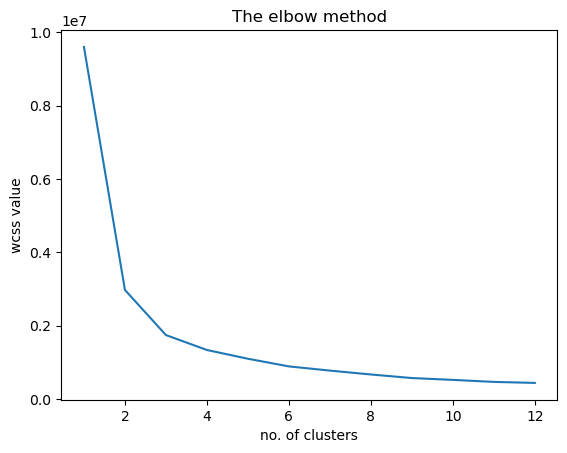

In [16]:
wcss=[]
for i in range(1,13):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,13),wcss)
plt.title("The elbow method")
plt.xlabel("no. of clusters")
plt.ylabel("wcss value")
plt.show()
    

In [17]:
df=df.values

In [18]:
type(df)

numpy.ndarray

In [19]:
kmeans=KMeans(n_clusters=2,init="k-means++",random_state=42)
y_kmeans=kmeans.fit_predict(df)

C:\Users\Shemeem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [20]:
y_kmeans

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,

In [21]:
from sklearn.metrics import silhouette_score
score1 = silhouette_score(df,y_kmeans)
print("silhouette Score:", score1)

silhouette Score: 0.5640701111904445


<h1 style="background-color:WHITE; color:green; text-align:center;padding: 12px; boarder-radius: 15px; font-wight: bold"> PCA
</h1

In [22]:
from sklearn.decomposition import PCA

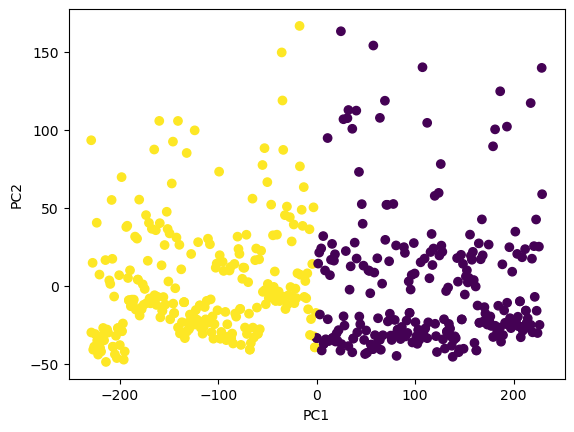

In [23]:
pca = PCA(n_components=3)
reduced = pca.fit_transform(df)

plt.scatter(reduced[:,0], reduced[:,1], c=kmeans.labels_)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [24]:
new_data=[[1,3,142,126,22,2.37,0.44,0.045]]

In [25]:
predict=kmeans.predict(new_data)
predict

array([1], dtype=int32)

<h1 style="background-color:WHITE; color:green; text-align:center;padding: 12px; boarder-radius: 15px; font-wight: bold"> DBSCAN
</h1

In [26]:
from sklearn.cluster import DBSCAN

In [27]:
epsilon =0.54
min_samples = 2
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
labels = dbscan.fit_predict(reduced)

In [28]:
set(labels)

{np.int64(-1),
 np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(10),
 np.int64(11),
 np.int64(12),
 np.int64(13),
 np.int64(14),
 np.int64(15),
 np.int64(16),
 np.int64(17),
 np.int64(18),
 np.int64(19),
 np.int64(20),
 np.int64(21),
 np.int64(22),
 np.int64(23),
 np.int64(24),
 np.int64(25),
 np.int64(26),
 np.int64(27),
 np.int64(28),
 np.int64(29),
 np.int64(30),
 np.int64(31),
 np.int64(32),
 np.int64(33),
 np.int64(34),
 np.int64(35),
 np.int64(36),
 np.int64(37),
 np.int64(38),
 np.int64(39)}

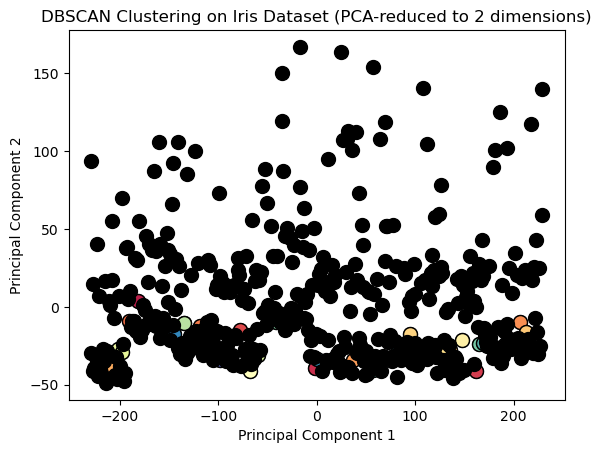

In [29]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  

    class_member_mask = (labels == k)
    xy = reduced[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10)
plt.title("DBSCAN Clustering on Iris Dataset (PCA-reduced to 2 dimensions)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [30]:
unique_labels

{np.int64(-1),
 np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(10),
 np.int64(11),
 np.int64(12),
 np.int64(13),
 np.int64(14),
 np.int64(15),
 np.int64(16),
 np.int64(17),
 np.int64(18),
 np.int64(19),
 np.int64(20),
 np.int64(21),
 np.int64(22),
 np.int64(23),
 np.int64(24),
 np.int64(25),
 np.int64(26),
 np.int64(27),
 np.int64(28),
 np.int64(29),
 np.int64(30),
 np.int64(31),
 np.int64(32),
 np.int64(33),
 np.int64(34),
 np.int64(35),
 np.int64(36),
 np.int64(37),
 np.int64(38),
 np.int64(39)}

In [31]:
from sklearn.metrics import silhouette_score
score2 = silhouette_score(reduced,labels)
print("silhouette Score:", score2)

silhouette Score: -0.5186831342679648


<h1 style="background-color:WHITE; color:green; text-align:center;padding: 12px; boarder-radius: 15px; font-wight: bold"> DENDROGRAM
</h1

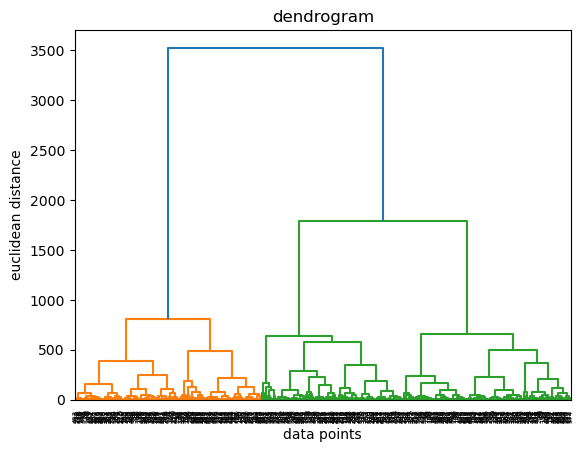

In [32]:
dendrogram=sch.dendrogram(sch.linkage(reduced,method='ward'))

plt.title('dendrogram')

plt.xlabel('data points')

plt.ylabel('euclidean distance')

plt.show()

<h1 style="background-color:WHITE; color:green; text-align:center;padding: 12px; boarder-radius: 15px; font-wight: bold">AgglomerativeClustering
</h1

In [33]:
ahc=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')

y_ahc=ahc.fit_predict(reduced)

In [34]:
y_ahc

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,

In [35]:
score3 = silhouette_score(reduced,y_ahc)
score3

np.float64(0.5306995922619686)

<h1 style="background-color:WHITE; color:green; text-align:center;padding: 20px; boarder-radius: 20px; font-wight: bold"> FUZZY CLUSTERING
</h1

In [36]:
pip install scikit-fuzzy


Note: you may need to restart the kernel to use updated packages.


In [37]:
X=reduced.T
cluster_range = range(2, 7)

fpc_values = []              

for c in cluster_range:
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        X,
        c=c,
        m=2,
        error=0.005,
        maxiter=1000
    )
    fpc_values.append(fpc)

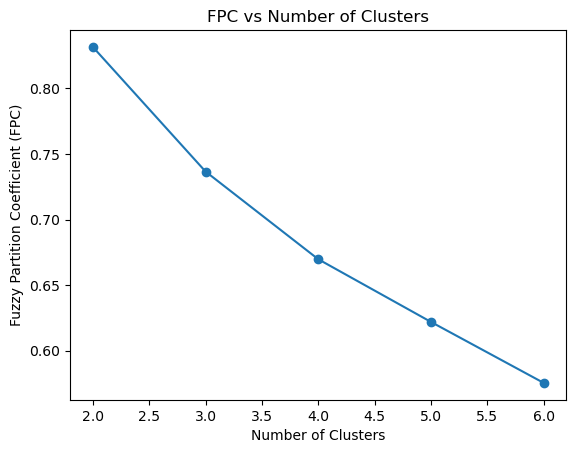

In [38]:
plt.figure()
plt.plot(cluster_range, fpc_values, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Fuzzy Partition Coefficient (FPC)")
plt.title("FPC vs Number of Clusters")
plt.show()

In [39]:
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    reduced.T, c=3, m=2, error=0.005, maxiter=1000
)


u_transposed = u.T

hard_clusters = np.argmax(u_transposed, axis=1)



score4= silhouette_score(reduced, hard_clusters)
print("Silhouette Score:",score4)

Silhouette Score: 0.4854261958293697


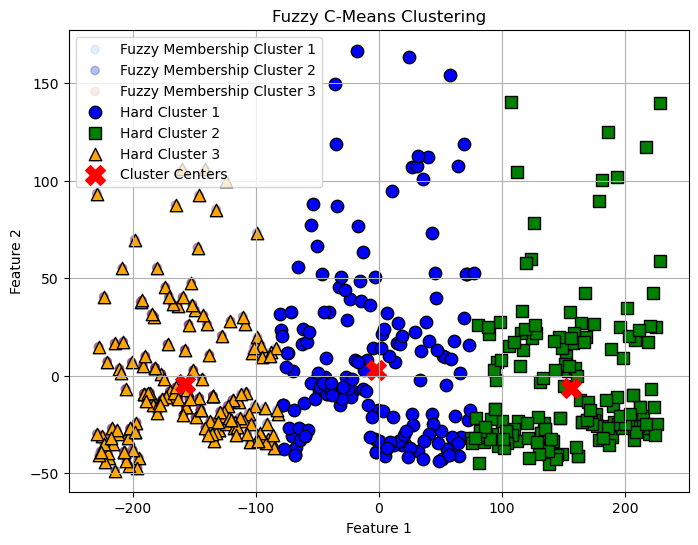

In [40]:
n_clusters = u.shape[0]  

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(n_clusters):
    ax.scatter(
        reduced[:, 0],
        reduced[:, 1],
        c=u[i],                
        cmap='coolwarm',
        alpha=0.4,
        label=f'Fuzzy Membership Cluster {i+1}'
    )


markers = ['o', 's', '^', 'D']
colors = ['blue', 'green', 'orange', 'purple']

for i in range(n_clusters):
    cluster_points = reduced[hard_clusters == i]
    ax.scatter(
        cluster_points[:, 0],
        cluster_points[:, 1],
        c=colors[i],
        marker=markers[i],
        edgecolor='k',
        s=80,
        label=f'Hard Cluster {i+1}'
    )

ax.scatter(
    cntr[:, 0],
    cntr[:, 1],
    c='red',
    marker='X',
    s=200,
    label='Cluster Centers'
)

ax.set_title('Fuzzy C-Means Clustering')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.legend(loc='upper left')
ax.grid(True)

plt.show()

<h1 style="background-color:WHITE; color:green; text-align:center;padding: 20px; boarder-radius: 20px; font-wight: bold"> TABULATE
</h1

In [41]:
from tabulate import tabulate

table = [
    ['Clustering Method', 'Silhouette Score'],
    ['KMeans', score1],
    ['DBSCAN', score2],
    ['Agglomerative', score3],
    ['Fuzzy C-Means', score4],
   
]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═════════════════════╤════════════════════╕
│ Clustering Method   │   Silhouette Score │
╞═════════════════════╪════════════════════╡
│ KMeans              │           0.56407  │
├─────────────────────┼────────────────────┤
│ DBSCAN              │          -0.518683 │
├─────────────────────┼────────────────────┤
│ Agglomerative       │           0.5307   │
├─────────────────────┼────────────────────┤
│ Fuzzy C-Means       │           0.485426 │
╘═════════════════════╧════════════════════╛


In [42]:
dataset['cluster']=y_kmeans
dataset

,label,topic,text,length_chars,length_words,quality_score,sentiment,plagiarism_score,cluster
0,1,3,142,126,22,2.37,0.44,0.045,1
1,0,9,121,141,19,3.44,0.60,0.007,1
2,1,0,177,112,17,3.16,-0.43,0.163,1
3,0,7,116,101,14,3.32,0.44,0.122,1
4,1,2,237,78,14,3.52,-0.31,0.105,0
...,...,...,...,...,...,...,...,...,...
495,1,5,154,119,18,2.92,0.20,0.158,1
496,0,6,434,97,14,3.97,0.90,0.067,0
497,0,6,377,95,13,2.94,0.30,0.132,0
498,1,1,132,81,12,1.86,-0.13,0.048,1


In [43]:
cluster_summery=dataset.groupby("cluster")[["label","topic","text","length_chars","length_words","quality_score","sentiment","plagiarism_score"]].mean().round(2)
cluster_summery

,label,topic,text,length_chars,length_words,quality_score,sentiment,plagiarism_score
cluster,,,,,,,,
0,0.35,4.55,344.31,114.53,16.52,3.6,0.17,0.11
1,0.65,4.28,114.04,115.78,17.08,3.4,0.15,0.14


In [50]:
if 'Product' in dataset.columns and 'Sales_Channel' in dataset.columns:
    cluster_summery['Most_Common_Product'] = (
        dataset.groupby('Kmeans_Cluster')['Product']
        .agg(lambda x: x.value_counts().idxmax())
    )
    
    cluster_summery['Most_Common_Sales_Channel'] = (
        sl_df.groupby('Kmeans_Cluster')['Sales_Channel']
        .agg(lambda x: x.value_counts().idxmax())
    )

print("Ai and Human Dataset Cluster Summary (KMeans k=2):")
print(cluster_summery)

Ai and Human Dataset Cluster Summary (KMeans k=2):
         label  topic    text  length_chars  length_words  quality_score  \
cluster                                                                    
0         0.35   4.55  344.31        114.53         16.52            3.6   
1         0.65   4.28  114.04        115.78         17.08            3.4   

         sentiment  plagiarism_score  
cluster                               
0             0.17              0.11  
1             0.15              0.14  


| Cluster | Avg Label | Avg Topic | Avg Text Length | Avg Characters | Avg Words | Avg Quality Score | Avg Sentiment | Avg Plagiarism Score | Summary Description                                                                                                                         |
| ------- | --------- | --------- | --------------- | -------------- | --------- | ----------------- | ------------- | -------------------- | ------------------------------------------------------------------------------------------------------------------------------------------- |
| 0       | 0.35      | 4.55      | 344.31          | 114.53         | 16.52     | 3.6               | 0.17          | 0.11                 | Longer, more detailed text with slightly higher quality and sentiment; lower plagiarism risk. Likely human-like or high-quality AI content. |
| 1       | 0.65      | 4.28      | 114.04          | 115.78         | 17.08     | 3.4               | 0.15          | 0.14                 | Shorter, concise text with slightly lower quality and sentiment; higher plagiarism risk. Likely AI-generated or formulaic content.          |
